In [15]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('data/col_data.csv', encoding="latin-1")

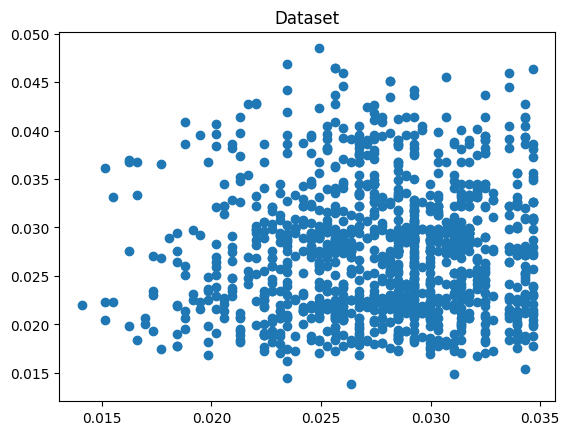

In [16]:
colx = "artist_pop_norm"
coly = "tempo_norm"
X = pd.DataFrame(data[[colx, coly]])
plt.plot()
plt.title('Dataset')
plt.scatter(data[colx], data[coly])
plt.show()

In [17]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 100)

for k in K:
	# Building and fitting the model
	kmeanModel = KMeans(n_clusters=k).fit(X)
	kmeanModel.fit(X)

	distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
										'euclidean'), axis=1)) / X.shape[0])
	inertias.append(kmeanModel.inertia_)

	mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
								'euclidean'), axis=1)) / X.shape[0]
	mapping2[k] = kmeanModel.inertia_


In [18]:
# for key, val in mapping1.items():
#     print(f'{key} : {val}')

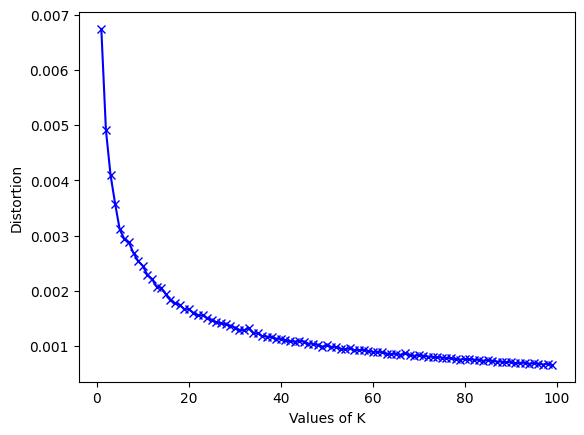

In [19]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.show()

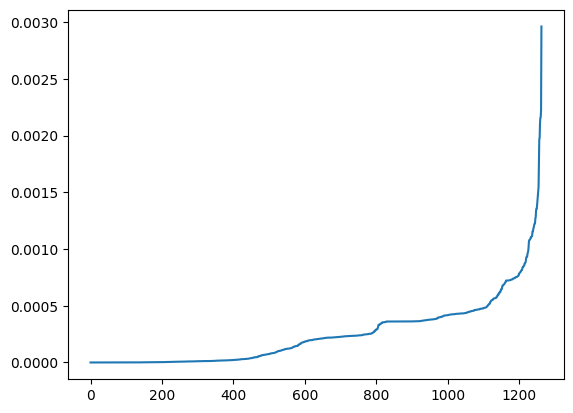

In [20]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
 
neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)